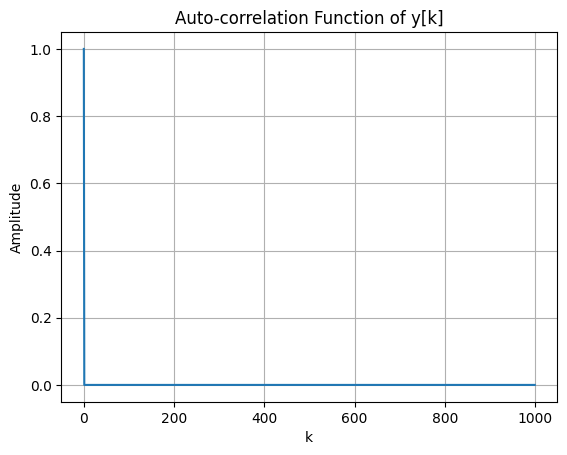

Linear mean of y[k]: 0
Variance of y[k]: 1000


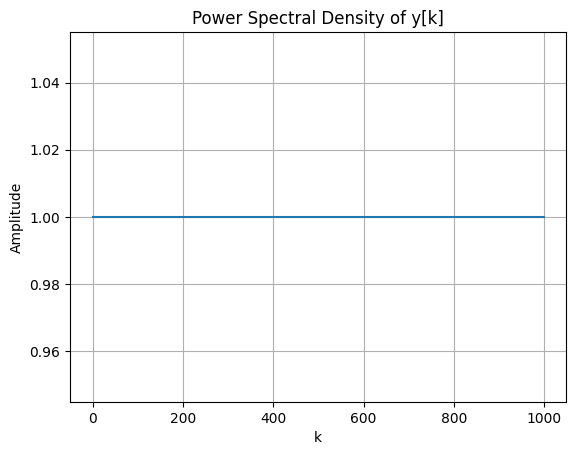

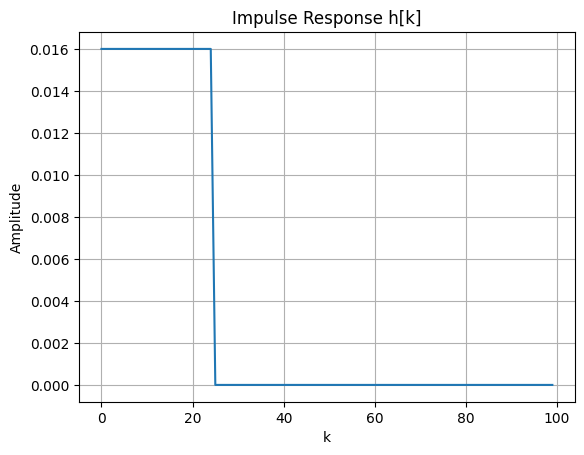

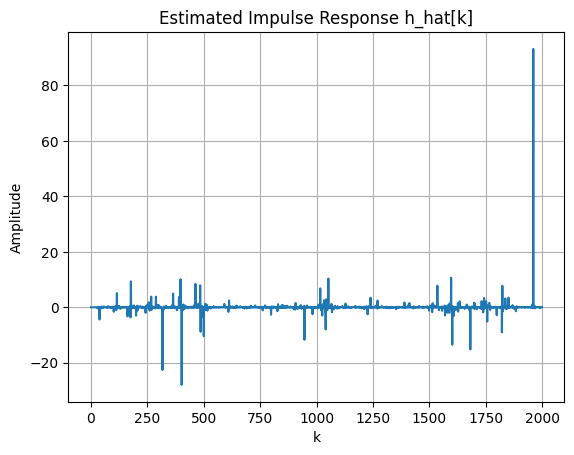

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Omega_c = np.pi / 2
Phi_0 = 1  # Assuming unit power for simplicity

# Function to calculate DTFT of transfer function H(ejΩ)
def H(ejOmega):
    if abs(ejOmega) < Omega_c:
        return 1
    elif Omega_c <= abs(ejOmega) <= np.pi:
        return 0

# Task 1: Calculate ACF, linear mean, and variance of the output signal y[k]

# Auto-correlation function (ACF) of output signal y[k]
def ACF_y(N):
    acf_y = [H(np.exp(1j * Omega)) * H(np.exp(-1j * Omega)) for Omega in np.linspace(-np.pi, np.pi, N)]
    return np.fft.ifft(acf_y).real

# Linear mean of output signal y[k]
def mean_y():
    return 0  # As white noise is zero mean, mean of y[k] will also be zero

# Variance of output signal y[k]
def variance_y():
    return np.sum([H(np.exp(1j * Omega)) * H(np.exp(-1j * Omega)) for Omega in np.linspace(-np.pi, np.pi, 1000)])

# Task 2: Calculate PSD of output signal y[k]

# PSD of output signal y[k]
def PSD_y(N):
    return np.abs(np.fft.fft(ACF_y(N)))

# Task 3: Generate white noise signal x[k], create finite impulse response h[k], and apply convolution

# Generate white noise signal x[k]
def generate_white_noise(N):
    return np.random.normal(0, np.sqrt(Phi_0), N)

# Create finite impulse response h[k] of a simple LTI system (lowpass)
def create_FIR():
    h = np.zeros(100)
    h[:25] = 0.4 / 25  # Smoothly decreasing from 0.4 to 0.0
    return h

# Convolution y[k] = x[k] * h[k]
def convolution(x, h):
    return np.convolve(x, h, mode='same')

# Estimate impulse response h_hat[k] based on correlation functions
def estimate_impulse_response(x, y):
    R_xy = np.correlate(x, y, mode='full') / len(x)
    R_xx = np.correlate(x, x, mode='full') / len(x)
    return np.divide(R_xy, R_xx)

# Plot functions
def plot_signal(signal, title):
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Task 1
N = 1000
acf_y = ACF_y(N)
mean_y = mean_y()
variance_y = variance_y()

plot_signal(acf_y, 'Auto-correlation Function of y[k]')
print("Linear mean of y[k]:", mean_y)
print("Variance of y[k]:", variance_y)

# Task 2
PSD_y = PSD_y(N)
plot_signal(PSD_y, 'Power Spectral Density of y[k]')

# Task 3
x = generate_white_noise(N)
h = create_FIR()
y = convolution(x, h)
h_hat = estimate_impulse_response(x, y)

plot_signal(h, 'Impulse Response h[k]')
plot_signal(h_hat[:2000], 'Estimated Impulse Response h_hat[k]')
